# Convolutional Neural Networks (CNN) with TensorFlow

* [DataCamp Tutorial](https://www.datacamp.com/community/tutorials/cnn-tensorflow-python)
* [DataCamp Keras Tutorial](https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python)
* [TensorFlow Keras Classification](https://www.tensorflow.org/tutorials/keras/classification)
* [TensorFlow Keras API](https://www.tensorflow.org/guide/keras/functional)
* [TensorFlow Keras Save and Load Models](https://www.tensorflow.org/tutorials/keras/save_and_load)
* [Deploy trained Keras/TensorFlow models to SageMaker](https://aws.amazon.com/blogs/machine-learning/deploy-trained-keras-or-tensorflow-models-using-amazon-sagemaker/)
* [Save and Serializes TensorFlow/Keras Models](https://www.tensorflow.org/guide/keras/save_and_serialize)

In [1]:
import tensorflow as tf
from tensorflow import keras

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

print(tf.__version__)

2.0.0


## Explore Data

In [2]:
# Download Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
keras.utils.to_categorical

<function tensorflow.python.keras.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape:', train_images.shape, train_labels.shape)
print('Test data shape:', test_images.shape, test_labels.shape)

Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


In [6]:
classes = np.unique(train_labels)
num_classes = len(classes)
print('Total number of outputs:', num_classes)
print('Output classes:', classes)

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


In [7]:
def display_image(image, label, cmap=None):
    plt.figure(figsize=(5,5))
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.grid(False)
    plt.title("Ground truth: {}".format(label))
    plt.show()

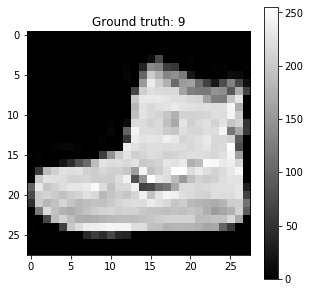

In [8]:
display_image(train_images[0], train_labels[0], cmap="gray")

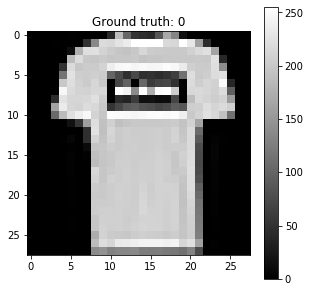

In [9]:
display_image(train_images[1], train_labels[1], cmap="gray")

## Preprocess Images

In [10]:
# Scale the values of the images to a range of 0 to 1 before feeding into CNN
def preprocess_images(images):
    # reshape each image from 28,28 to a 28,28,1
    preprocessed_images = images.reshape(-1, 28,28, 1)
    # convert type to float32
    preprocessed_images = preprocessed_images.astype('float32')
    return preprocessed_images / 255

In [11]:
train_X = preprocess_images(train_images)
test_X = preprocess_images(test_images)

In [12]:
# Convert labels to one hot encoding
def convert_to_one_hot(labels):
    return keras.utils.to_categorical(labels)

In [13]:
train_Y = convert_to_one_hot(train_labels)
test_Y = convert_to_one_hot(test_labels)

In [14]:
# Split dataset
from sklearn.model_selection import train_test_split

In [15]:
train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)

In [16]:
train_X.shape, valid_X.shape, train_Y.shape, valid_Y.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

## Train Model

In [46]:
from tensorflow.keras import (
    layers,
    models,
    activations,
    losses,
    optimizers,
)

In [47]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2),padding='same'),
    layers.Conv2D(64, (3, 3), activation='linear',padding='same'),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    layers.Conv2D(128, (3, 3), activation='linear',padding='same'),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='linear'),
    layers.LeakyReLU(alpha=0.1),        
    layers.Dense(num_classes, activation='softmax'),
])

In [48]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)        

In [51]:
batch_size = 64
epochs = 20

In [52]:
model_train = model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_Y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 28s 586us/sample - loss: 0.4629 - accuracy: 0.8329 - val_loss: 0.3202 - val_accuracy: 0.8824
Epoch 2/20
48000/48000 [==============================] - 27s 561us/sample - loss: 0.2871 - accuracy: 0.8954 - val_loss: 0.3036 - val_accuracy: 0.8851
Epoch 3/20
48000/48000 [==============================] - 28s 581us/sample - loss: 0.2416 - accuracy: 0.9098 - val_loss: 0.2394 - val_accuracy: 0.9146
Epoch 4/20
48000/48000 [==============================] - 26s 549us/sample - loss: 0.2086 - accuracy: 0.9225 - val_loss: 0.2374 - val_accuracy: 0.9143
Epoch 5/20
48000/48000 [==============================] - 28s 580us/sample - loss: 0.1833 - accuracy: 0.9331 - val_loss: 0.2424 - val_accuracy: 0.9128
Epoch 6/20
48000/48000 [==============================] - 27s 555us/sample - loss: 0.1609 - accuracy: 0.9396 - val_loss: 0.2255 - val_accuracy: 0.9178
Epoch 7/20
48000/48000 [====================

## Model Evaluation

Here the model's performance is evaluated further by using the test datasets.

In [67]:
def evaluate_model(model, test_X, test_Y):
    test_eval = model.evaluate(test_X, test_Y, verbose=0)
    print("Accuracy: {0} | Loss: {1}".format(test_eval[1], test_eval[0]))
    return test_eval


def plot_evaluation(model_train):
    accuracy = model_train.history['accuracy']
    val_accuracy = model_train.history['val_accuracy']
    loss = model_train.history['loss']
    val_loss = model_train.history['val_loss']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    

Accuracy: 0.9157999753952026 | Loss: 0.4816405092969537


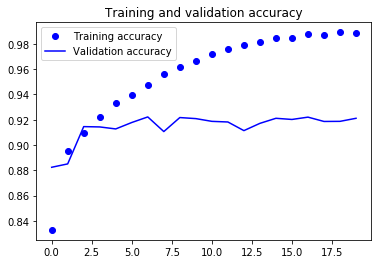

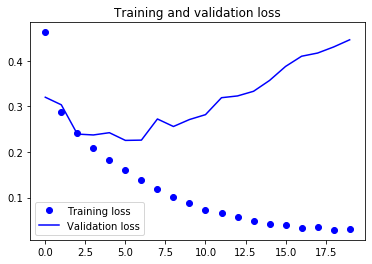

In [69]:
evaluate_model(model, test_X, test_Y)

plot_evaluation(model_train)

## Adding Dropout Layer

In [70]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D((2, 2),padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='linear',padding='same'),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='linear',padding='same'),
    layers.LeakyReLU(alpha=0.1),
    layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='linear'),
    layers.LeakyReLU(alpha=0.1),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax'),
])

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)         

In [72]:
model.compile(loss=losses.categorical_crossentropy, optimizer=optimizers.Adam(), metrics=['accuracy'])

In [73]:
model_train_dropout = model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_Y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 35s 731us/sample - loss: 0.5973 - accuracy: 0.7773 - val_loss: 0.3740 - val_accuracy: 0.8637
Epoch 2/20
48000/48000 [==============================] - 36s 757us/sample - loss: 0.3768 - accuracy: 0.8606 - val_loss: 0.3083 - val_accuracy: 0.8877
Epoch 3/20
48000/48000 [==============================] - 34s 701us/sample - loss: 0.3279 - accuracy: 0.8790 - val_loss: 0.2932 - val_accuracy: 0.8925
Epoch 4/20
48000/48000 [==============================] - 35s 724us/sample - loss: 0.3012 - accuracy: 0.8880 - val_loss: 0.2674 - val_accuracy: 0.9049
Epoch 5/20
48000/48000 [==============================] - 33s 677us/sample - loss: 0.2835 - accuracy: 0.8958 - val_loss: 0.2541 - val_accuracy: 0.9072
Epoch 6/20
48000/48000 [==============================] - 41s 857us/sample - loss: 0.2705 - accuracy: 0.8996 - val_loss: 0.2419 - val_accuracy: 0.9112
Epoch 7/20
48000/48000 [====================

Accuracy: 0.9154999852180481 | Loss: 0.23774151344895364


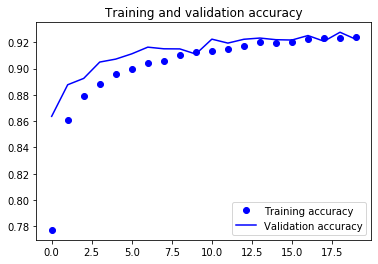

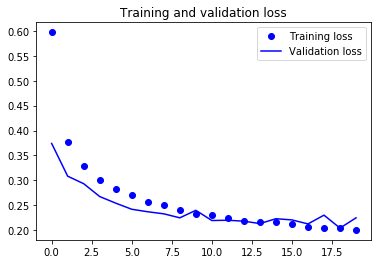

In [75]:
evaluate_model(model, test_X, test_Y)

plot_evaluation(model_train_dropout)

In [77]:
# https://www.tensorflow.org/guide/keras/save_and_serialize
model_filename = "../../models/fashion_model.h5"
model.save(model_filename)

In [85]:
# Serialized Keras Model Saving
import json
model_json = json.loads(model.to_json())

In [80]:
config = model.get_config()
weights = model.get_weights()

In [81]:
config

{'name': 'sequential_3',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'conv2d_11',
    'trainable': True,
    'batch_input_shape': (None, 28, 28, 1),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'LeakyReLU',
   'config': {'name': 'leaky_re_lu_8',
    'trainable': True,
    'dtype': 'float32',
    'alpha': 0.10000000149011612}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d_6',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': (2, 

In [83]:
weights

[array([[[[-4.61121975e-03,  2.80256152e-01, -1.17242903e-01,
           -1.28036886e-01, -1.64113209e-01, -5.54111749e-02,
            3.99334654e-02, -5.81454746e-02,  1.66337505e-01,
           -1.47501037e-01, -6.39857948e-02, -7.51880510e-03,
           -2.36690357e-01,  1.68883339e-01,  1.01628117e-01,
           -6.89671421e-03,  3.84482443e-02,  1.56084552e-01,
            5.10902181e-02,  1.53722361e-01, -1.04694359e-01,
           -3.21758538e-02,  1.54036865e-01,  4.50416617e-02,
           -3.03038768e-02,  4.26449999e-02,  4.98657636e-02,
            9.86628234e-02,  1.96860991e-02, -1.28218874e-01,
            2.20714193e-02, -9.81203243e-02]],
 
         [[ 2.42492016e-02,  7.98367336e-02, -1.97458714e-01,
           -5.96507974e-02, -1.99962631e-01,  2.66803443e-01,
           -2.98854592e-03,  8.93784016e-02, -7.38619640e-02,
           -1.98092774e-01, -1.22346058e-01,  6.58888072e-02,
            1.18238404e-01, -1.72013476e-01, -1.49677498e-02,
            1.7185504

In [86]:
model_json

{'class_name': 'Sequential',
 'config': {'name': 'sequential_3',
  'layers': [{'class_name': 'Conv2D',
    'config': {'name': 'conv2d_11',
     'trainable': True,
     'batch_input_shape': [None, 28, 28, 1],
     'dtype': 'float32',
     'filters': 32,
     'kernel_size': [3, 3],
     'strides': [1, 1],
     'padding': 'same',
     'data_format': 'channels_last',
     'dilation_rate': [1, 1],
     'activation': 'linear',
     'use_bias': True,
     'kernel_initializer': {'class_name': 'GlorotUniform',
      'config': {'seed': None}},
     'bias_initializer': {'class_name': 'Zeros', 'config': {}},
     'kernel_regularizer': None,
     'bias_regularizer': None,
     'activity_regularizer': None,
     'kernel_constraint': None,
     'bias_constraint': None}},
   {'class_name': 'LeakyReLU',
    'config': {'name': 'leaky_re_lu_8',
     'trainable': True,
     'dtype': 'float32',
     'alpha': 0.10000000149011612}},
   {'class_name': 'MaxPooling2D',
    'config': {'name': 'max_pooling2d_6',


In [90]:
import json
import os

def save_model(model, directory, save_weights=True):
    """ Save model as JSON and its weights as H5 """
    if not os.path.isdir(directory):
        os.makedirs(directory)
    
    model_filepath = os.path.join(directory, "model.json")
    model_json = json.loads(model.to_json())
    with open(model_filepath, 'w') as json_file:
        json.dump(model_json, json_file)
    
    if save_weights:
        weights = model.save_weights(os.path.join(directory, "model-weights.h5"))
        
        

In [91]:
save_model(model, "../../models/fashion/")

In [93]:
! ls ../../models/fashion

model.json  model-weights.h5
